## IMAGE BINARIZATION FOR HANDWRITING OCR

v2 - EDA - Ross Kimberlin - 5/26/2022

In [33]:
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import PIL
from PIL import Image

%matplotlib inline

### TESTING FIRST ON H-DIBCO 2016 IMAGES

#### TRYING imageio -

SEE https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/

In [19]:
read_dir_DIBCO = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [20]:
DIBCO_test_img_10 = imi.imread(read_dir_DIBCO + '10.bmp')

(315, 378, 3)
uint8


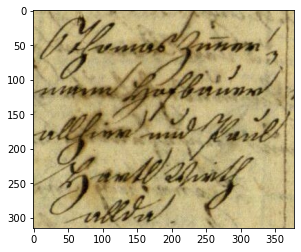

In [16]:
print(DIBCO_test_img_10.shape)
print(DIBCO_test_img_10.dtype)

plt.imshow(DIBCO_test_img_10);

#### TRYING PIL - 

SEE https://codeguru.academy/?p=364

In [34]:
DIBCO_test_img_10_PIL = Image.open(read_dir_DIBCO + '10.bmp')

In [36]:
width, height = DIBCO_test_img_10_PIL.size
print(width, height)

378 315


In [41]:
print(DIBCO_test_img_10_PIL.mode)
print(DIBCO_test_img_10_PIL.size)

RGB
(378, 315)


In [35]:
print(DIBCO_test_img_10_PIL.format)
print(DIBCO_test_img_10_PIL.mode)
print(DIBCO_test_img_10_PIL.histogram())

BMP
RGB
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 3, 3, 8, 8, 11, 10, 14, 18, 14, 16, 20, 27, 27, 26, 26, 24, 33, 35, 44, 34, 47, 43, 47, 56, 41, 59, 61, 60, 84, 58, 52, 69, 72, 74, 66, 81, 93, 91, 105, 97, 92, 115, 126, 108, 113, 132, 116, 115, 137, 141, 123, 149, 122, 124, 140, 128, 145, 160, 139, 160, 160, 167, 165, 163, 155, 173, 186, 162, 189, 189, 202, 209, 192, 217, 195, 211, 176, 230, 200, 198, 254, 220, 243, 201, 242, 208, 228, 244, 216, 259, 246, 249, 236, 217, 271, 258, 256, 273, 232, 270, 267, 261, 261, 244, 252, 250, 296, 269, 268, 300, 286, 299, 260, 288, 286, 264, 269, 294, 301, 335, 271, 325, 326, 317, 317, 342, 306, 348, 342, 372, 356, 355, 356, 384, 422, 431, 410, 423, 438, 453, 452, 480, 482, 492, 518, 509, 543, 535, 585, 591, 582, 623, 584, 635, 677, 675, 752, 787, 787, 877, 899, 945, 970, 1016, 1103, 1076, 1203, 1222, 1282, 1359, 1419, 1529, 1612, 1722, 1805, 1924, 2067, 2104, 2184, 2195, 2216, 2315, 2491, 2520, 2448, 2505, 2609, 2559, 2559, 2631, 2561, 2605, 2449, 2387

#### DE-NOISING

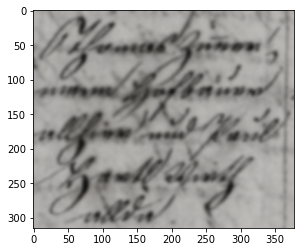

In [12]:
DTI_10_denoised_g = ndimage.gaussian_filter(DIBCO_test_img_10, 2.2)
 
plt.imshow(DTI_10_denoised_g)
plt.show()

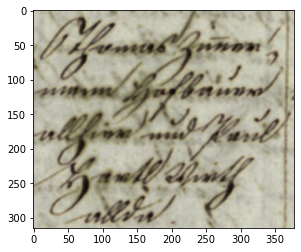

In [13]:
DTI_10_denoised_m = ndimage.median_filter(DIBCO_test_img_10, 4)
 
plt.imshow(DTI_10_denoised_m)
plt.show()

In [22]:
read_dir_cBAD = '../data/READ-ICDAR2019-cBAD-dataset/eval/'

In [24]:
cBAD_test_img_1708 = imi.imread(read_dir_cBAD + 'cPAS-1708.jpg')

(2665, 2160, 3)
uint8


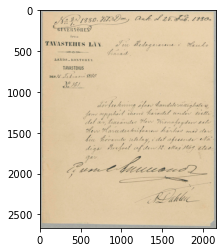

In [25]:
print(cBAD_test_img_1708.shape)
print(cBAD_test_img_1708.dtype)

plt.imshow(cBAD_test_img_1708);

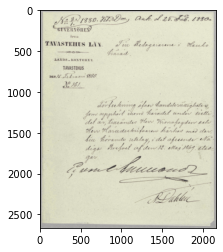

In [26]:
CTI_1708_denoised_m = ndimage.median_filter(cBAD_test_img_1708, 4)
 
plt.imshow(CTI_1708_denoised_m)
plt.show()

#### EDGE DETECTION

(GETS AN UNSUPPORTED DType ERROR FOR .bmp AND .jpg BOTH)

In [29]:
# x = ndimage.sobel(CTI_1708_denoised_m, axis=0, mode='constant')
# y = ndimage.sobel(CTI_1708_denoised_m, axis=1, mode='constant')
# Sob = np.hypot(x, y)
 
# plt.imshow(Sob)

#### CONVERTING TO numpy ARRAY - 

SEE https://codeguru.academy/?p=364

In [39]:
DTI_10_arr = np.asarray(DIBCO_test_img_10)
print(type(DTI_10_arr))
print(DTI_10_arr.shape)

<class 'numpy.ndarray'>
(315, 378, 3)


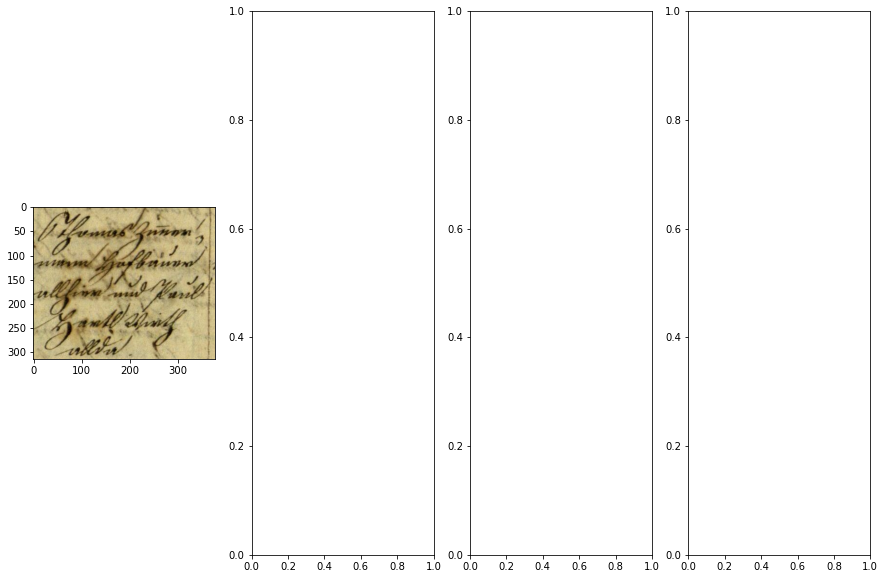

In [42]:
fig, axs = plt.subplots(1,4, figsize=(15, 10))
axs[0].imshow(DTI_10_arr)

In [43]:
DTI_10_gray = np.array(DIBCO_test_img_10.convert('L'))
DTI_10_bin = (DTI_10_gray > 128) * 255
DTI_10_bin_keep = (DTI_10_gray > 128) * DTI_10_bin
im_combined = np.concatenate((DTI_10_gray, 
                              DTI_10_bin, 
                              DTI_10_bin_keep), 
                             axis=1)

AttributeError: 'Array' object has no attribute 'convert'